In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df = pd.read_csv('baseball_5.csv')
df

,Salary,Hits,Walks,PutOuts,CHits
0,475.0,81,39,632,835
1,480.0,130,76,880,457
2,500.0,141,37,200,1575
3,91.5,87,30,805,101
4,750.0,169,35,282,1133
...,...,...,...,...,...
258,700.0,127,37,325,806
259,875.0,136,94,313,1511
260,385.0,126,52,37,433
261,960.0,144,78,1314,857


## Q1

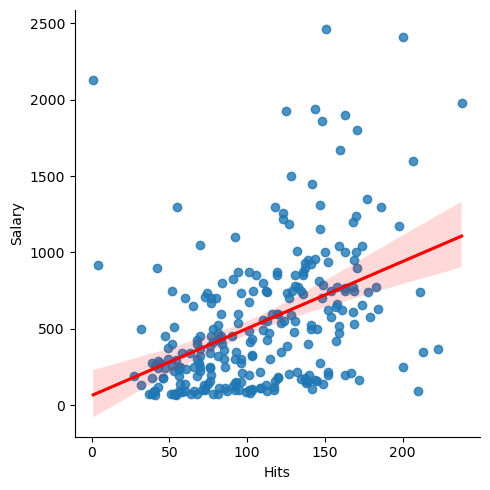

In [5]:
sns.lmplot(data=df, x='Hits', y='Salary', line_kws={'color': 'red'});

In [17]:
lr = LinearRegression()
X = df[['Hits']]
y = df['Salary']

lr.fit(X,y)
print('Intercept: '+str(lr.intercept_))
print('slope: '+str(lr.coef_[0]))

Intercept: 63.04881890502082
slope: 4.385439106737879


In [65]:
std_hat = np.sqrt( sum((y-lr.predict(X))**2) / (263-2) )

SE_intercept = std_hat**2 * (1/263 + df['Hits'].mean()**2 / sum( (df['Hits']- df['Hits'].mean())**2 )  )
SE_intercept = np.sqrt(SE_intercept)

SE_slpoe = std_hat**2 / sum( (df['Hits']- df['Hits'].mean())**2 )
SE_slpoe = np.sqrt(SE_slpoe)
print('Standard error of intertcept: ' + str(SE_intercept))
print('Standard error of slope: ' + str(SE_slpoe))

Standard error of intertcept: 64.98222495903728
Standard error of slope: 0.5560819634701049


In [75]:
RSS = sum((y-lr.predict(X))**2) 
print('RSS: ' + str(RSS))

TSS = y.var() * (263 - 1)

R2 = 1 - RSS/TSS
print('R2: ' + str(R2))

RSS: 43058621.29224819
R2: 0.1924355256447966


## Q2

In [78]:
mul_lr = LinearRegression()
X = df[['Hits','Walks','PutOuts','CHits']]
y = df['Salary']

mul_lr.fit(X,y)
print('Intercept: '+str(mul_lr.intercept_))
print('regression coefficients: '+str(mul_lr.coef_))

Intercept: -109.83480833885721
regression coefficients: [1.84600767 3.46111076 0.27090627 0.31245668]


In [125]:
std_hat = np.sqrt( sum((y-mul_lr.predict(X))**2) / (263-4-1) )

In [137]:
df['b0'] = 1
Xm = np.matrix(df[['b0','Hits','Walks','PutOuts','CHits']])

XX1 = np.linalg.inv( np.matmul(Xm.transpose(),Xm) )

SE_coeficients = [np.sqrt(XX1[i,i]) * std_hat for i in range(1,5)]
print('SE of coeficients: ' + str(SE_coeficients))


SE of coeficients: [0.5810610329611922, 1.211660935036406, 0.07861078317799443, 0.033496472043460006]


In [138]:
RSS = sum((y-mul_lr.predict(X))**2) 
print('RSS: ' + str(RSS))

TSS = y.var() * (263 - 4 - 1)

R2 = 1 - RSS/TSS
print('R2: ' + str(R2))

RSS: 29223383.934973385
R2: 0.44341797710453945


In [140]:
mul_lr.coef_/SE_coeficients > 1.96 #True means reject

array([ True,  True,  True,  True])